In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
# from sklearn.utils import shuffle
# from sklearn.model_selection import train_test_split
# from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression, MultiTaskElasticNet, MultiTaskLasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.multioutput import MultiOutputRegressor
from sklearn.metrics import confusion_matrix, mean_squared_error, log_loss, accuracy_score
import time
# from sklearn.manifold import TSNE
import joblib


# pd.set_option('display.max_columns', None)
# pd.set_option('display.max_rows', None)

In [2]:
pd.__version__

'0.24.2'

## load data

In [3]:
Xtrain = np.load('encoded_data_clip_fast/Xtrain.npy')
Xdev = np.load('encoded_data_clip_fast/Xdev.npy')
# Xtest = np.load('data/Xtest.npy')

In [4]:
ytrain = np.load('encoded_data_clip_fast/ytrain.npy')
ydev = np.load('encoded_data_clip_fast/ydev.npy')
# ytest = np.load('data/ytest.npy')

## Build NN Model

In [5]:
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import optimizers
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint


In [6]:
n_features = Xtrain.shape[1]
n_outputs = ytrain.shape[1]

inputs = keras.Input(shape=(n_features,), name='input_features')
x = layers.Dense(128, activation='relu', name='dense_1')(inputs)
x = layers.Dense(128, activation='relu', name='dense_2')(x)
x = layers.Dense(128, activation='relu', name='dense_3')(x)
x = layers.Dense(128, activation='relu', name='dense_4')(x)
x = layers.Dense(128, activation='relu', name='dense_5')(x)
outputs = layers.Dense(n_outputs, name='predictions')(x)

model = keras.Model(inputs=inputs, outputs=outputs)

W0906 21:14:07.678675 139730131195648 deprecation.py:506] From /data/home/t-chepan/env/newlab/lib/python3.5/site-packages/tensorflow/python/ops/init_ops.py:1251: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [7]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_features (InputLayer)  [(None, 446)]             0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               57216     
_________________________________________________________________
dense_2 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_3 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_4 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_5 (Dense)              (None, 128)               16512     
_________________________________________________________________
predictions (Dense)          (None, 12)                1548  

In [9]:
opt = keras.optimizers.Adam(0.0001349800908161859)

model.compile(loss='mean_squared_error',
              optimizer=opt,
              metrics=['mean_squared_error'])

early_stop = EarlyStopping(monitor='val_loss', patience=5)


In [10]:
data_size = [0.001, 0.002, 0.004, 0.008, 0.016, 0.02, 
             0.03, 0.04, 0.08, 0.10, 0.15, 0.20,
#              0.21, 0.22
            ]

## NN model
nn_results = []
full_size = Xtrain.shape[0]
print('full training size is {}'.format(full_size))
# Xdev = Xdev[:100,:]
# ydev = ydev[:100,:]


## run the nn model with certain size of training data

for i in data_size[:]:
    t1 = time.time()
    results = {}
    
    selected_size = int(full_size * i)
    print('selected training size is {}'.format(selected_size))
    
    Xtrain_selected = Xtrain[:selected_size,:]
    ytrain_selected = ytrain[:selected_size,:]

    hist = model.fit(Xtrain_selected, ytrain_selected,
                     batch_size=64,
                     epochs=100,
                     verbose=1,
                     callbacks=[early_stop],
                     validation_data=(Xdev, ydev))
    
    results['data_size'] = i
    results['Dev_mse'] = min(hist.history['val_mean_squared_error'])
    
    nn_results.append(results)
    
    t2 = time.time()
    print('used time in {} seconds.'.format(t2-t1))

full training size is 1358666
selected training size is 1358
Train on 1358 samples, validate on 13863 samples
Epoch 1/100
1358/1358 [==============================] - 1s 576us/sample - loss: 0.1749 - mean_squared_error: 0.1749 - val_loss: 0.1271 - val_mean_squared_error: 0.1271
Epoch 2/100
1358/1358 [==============================] - 0s 262us/sample - loss: 0.1157 - mean_squared_error: 0.1157 - val_loss: 0.1119 - val_mean_squared_error: 0.1119
Epoch 3/100
1358/1358 [==============================] - 0s 252us/sample - loss: 0.0916 - mean_squared_error: 0.0916 - val_loss: 0.0969 - val_mean_squared_error: 0.0969
Epoch 4/100
1358/1358 [==============================] - 0s 262us/sample - loss: 0.0747 - mean_squared_error: 0.0747 - val_loss: 0.0843 - val_mean_squared_error: 0.0843
Epoch 5/100
1358/1358 [==============================] - 0s 286us/sample - loss: 0.0636 - mean_squared_error: 0.0636 - val_loss: 0.0744 - val_mean_squared_error: 0.0744
Epoch 6/100
1358/1358 [======================

5434/5434 [==============================] - 1s 97us/sample - loss: 0.0361 - mean_squared_error: 0.0361 - val_loss: 0.0489 - val_mean_squared_error: 0.0489
Epoch 4/100
5434/5434 [==============================] - 1s 99us/sample - loss: 0.0350 - mean_squared_error: 0.0350 - val_loss: 0.0489 - val_mean_squared_error: 0.0489
Epoch 5/100
5434/5434 [==============================] - 1s 98us/sample - loss: 0.0341 - mean_squared_error: 0.0341 - val_loss: 0.0486 - val_mean_squared_error: 0.0486
Epoch 6/100
5434/5434 [==============================] - 1s 98us/sample - loss: 0.0335 - mean_squared_error: 0.0335 - val_loss: 0.0492 - val_mean_squared_error: 0.0492
Epoch 7/100
5434/5434 [==============================] - 1s 96us/sample - loss: 0.0330 - mean_squared_error: 0.0330 - val_loss: 0.0485 - val_mean_squared_error: 0.0485
Epoch 8/100
5434/5434 [==============================] - 1s 97us/sample - loss: 0.0325 - mean_squared_error: 0.0325 - val_loss: 0.0490 - val_mean_squared_error: 0.0490
Epoc

54346/54346 [==============================] - 3s 50us/sample - loss: 0.0350 - mean_squared_error: 0.0350 - val_loss: 0.0403 - val_mean_squared_error: 0.0403
Epoch 2/100
54346/54346 [==============================] - 3s 50us/sample - loss: 0.0342 - mean_squared_error: 0.0342 - val_loss: 0.0400 - val_mean_squared_error: 0.0400
Epoch 3/100
54346/54346 [==============================] - 3s 50us/sample - loss: 0.0339 - mean_squared_error: 0.0339 - val_loss: 0.0401 - val_mean_squared_error: 0.0401
Epoch 4/100
54346/54346 [==============================] - 3s 51us/sample - loss: 0.0335 - mean_squared_error: 0.0335 - val_loss: 0.0399 - val_mean_squared_error: 0.0399
Epoch 5/100
54346/54346 [==============================] - 3s 48us/sample - loss: 0.0333 - mean_squared_error: 0.0333 - val_loss: 0.0400 - val_mean_squared_error: 0.0400
Epoch 6/100
54346/54346 [==============================] - 3s 49us/sample - loss: 0.0331 - mean_squared_error: 0.0331 - val_loss: 0.0398 - val_mean_squared_error:

Epoch 2/100
271733/271733 [==============================] - 14s 52us/sample - loss: 0.0337 - mean_squared_error: 0.0337 - val_loss: 0.0371 - val_mean_squared_error: 0.0371
Epoch 3/100
271733/271733 [==============================] - 14s 53us/sample - loss: 0.0336 - mean_squared_error: 0.0336 - val_loss: 0.0369 - val_mean_squared_error: 0.0369
Epoch 4/100
271733/271733 [==============================] - 15s 57us/sample - loss: 0.0334 - mean_squared_error: 0.0334 - val_loss: 0.0368 - val_mean_squared_error: 0.0368
Epoch 5/100
271733/271733 [==============================] - 15s 54us/sample - loss: 0.0333 - mean_squared_error: 0.0333 - val_loss: 0.0367 - val_mean_squared_error: 0.0367
Epoch 6/100
271733/271733 [==============================] - 15s 56us/sample - loss: 0.0332 - mean_squared_error: 0.0332 - val_loss: 0.0368 - val_mean_squared_error: 0.0368
Epoch 7/100
271733/271733 [==============================] - 15s 56us/sample - loss: 0.0331 - mean_squared_error: 0.0331 - val_loss: 0.

In [11]:
nn_df = pd.DataFrame(nn_results)
nn_df.to_csv('results_clip_fast/nn_results_with_5Layers_128H.csv', index=False)
nn_df

,Dev_mse,data_size
0,0.056182,0.001
1,0.052614,0.002
2,0.048510,0.004
3,0.044618,0.008
4,0.042093,0.016
5,0.041735,0.020
6,0.040755,0.030
7,0.039818,0.040
8,0.038075,0.080
9,0.037814,0.100


In [29]:
# nn_df_1= pd.read_csv('results/nn_results_with_4Layers_64H_rmsprop.csv')

## Build up NN model (trial version, the official version in .py file)

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# from sklearn import preprocessing
# from sklearn.utils import shuffle
# from sklearn.model_selection import train_test_split
# from sklearn.preprocessing import StandardScaler
# from sklearn.neighbors import KNeighborsRegressor
# from sklearn.linear_model import LinearRegression, MultiTaskElasticNet, MultiTaskLasso
# from sklearn.ensemble import RandomForestRegressor
# from sklearn.multioutput import MultiOutputRegressor
from sklearn.metrics import confusion_matrix, mean_squared_error, log_loss, accuracy_score
import time
# from sklearn.manifold import TSNE
import joblib

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import optimizers
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

# pd.set_option('display.max_columns', None)
# pd.set_option('display.max_rows', None)

In [5]:
Xtrain = np.load('data/Xtrain.npy')
Xdev = np.load('data/Xdev.npy')

ytrain = np.load('data/ytrain.npy')
ydev = np.load('data/ydev.npy')

In [3]:
hyp_params = {'fc_hidden_size': 64,
              'lr': 0.0007126048096008777,
              'n_fc_layers': 5,
              'opt': 'rmsprop'}

In [ ]:
EPOCHS = 200
PATIENCE = 20

n_features = Xtrain.shape[1]
n_outputs = ytrain.shape[1]

opt = optimizers.RMSprop(lr=hyp_params['lr'])

inputs = keras.Input(shape=(n_features,), name='input_features')
x = layers.Dense(128, activation='relu', name='dense_1')(inputs)
x = layers.Dense(128, activation='relu', name='dense_2')(x)
x = layers.Dense(128, activation='relu', name='dense_3')(x)
x = layers.Dense(128, activation='relu', name='dense_4')(x)
x = layers.Dense(128, activation='relu', name='dense_5')(x)
outputs = layers.Dense(n_outputs, name='predictions')(x)

model = keras.Model(inputs=inputs, outputs=outputs)

model.compile(loss='mean_squared_error', 
              optimizer=opt, 
              metrics=['mean_squared_error'])

# The patience parameter is the amount of epochs to check for improvement
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=PATIENCE)
# checkpointer = ModelCheckpoint()

print('# Fit model on training data')
history = model.fit(Xtrain, ytrain,
                    batch_size=64,
                    epochs=EPOCHS,
                    verbose=1,
                    callbacks=[early_stop],
                    validation_data=(Xdev, ydev))


W0820 19:57:03.531414 140336225949440 deprecation.py:506] From /data/home/t-chepan/env/newlab/lib/python3.5/site-packages/tensorflow/python/ops/init_ops.py:1251: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


# Fit model on training data
Train on 1372529 samples, validate on 13863 samples


In [26]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()


,loss,mean_absolute_error,mean_squared_error,val_loss,val_mean_absolute_error,val_mean_squared_error,epoch
8,0.125373,0.082850,0.125373,0.043606,0.084971,0.043606,8
9,0.151064,0.082882,0.151064,0.043469,0.081863,0.043469,9
10,0.164769,0.082713,0.164769,0.042821,0.082496,0.042821,10
11,0.125326,0.082725,0.125326,0.046434,0.083126,0.046434,11
12,0.137902,0.082841,0.137902,0.044403,0.085540,0.044403,12


In [27]:
best_exp = hist.loc[hist['val_mean_squared_error'] == min(hist['val_mean_squared_error']),
                    ['mean_squared_error', 'val_mean_squared_error', 'epoch']]
print(best_exp)

   mean_squared_error  val_mean_squared_error  epoch
2            0.108347                0.042028      2


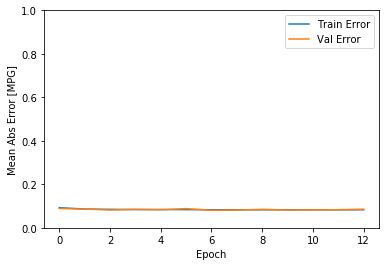

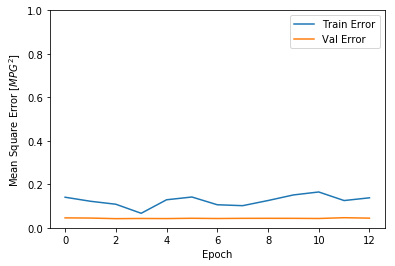

In [28]:
def plot_history(history):
    
    hist = pd.DataFrame(history.history)
    hist['epoch'] = history.epoch

    plt.figure()
    plt.xlabel('Epoch')
    plt.ylabel('Mean Abs Error [MPG]')
    plt.plot(hist['epoch'], hist['mean_absolute_error'],
           label='Train Error')
    plt.plot(hist['epoch'], hist['val_mean_absolute_error'],
           label = 'Val Error')
    plt.ylim([0,1.0])
    plt.legend()

    plt.figure()
    plt.xlabel('Epoch')
    plt.ylabel('Mean Square Error [$MPG^2$]')
    plt.plot(hist['epoch'], hist['mean_squared_error'],
           label='Train Error')
    plt.plot(hist['epoch'], hist['val_mean_squared_error'],
           label = 'Val Error')
    plt.ylim([0,1.0])
    plt.legend()
    plt.show()


plot_history(history)


In [29]:
Xtest_show = Xtest[:3]
ytest_show = ytest[:3]
predictions = model.predict(Xtest_show)
# print('predictions shape:', predictions.shape)
data = np.concatenate((ytest_show,predictions), axis=0)
data_df = pd.DataFrame(data=data, columns=output_cols)
data_df


,AR_exchange_06,AR_sharepoint_06,AR_skype_06,AR_teams_06,AR_od4b_06,AR_onenote_06,AR_word_06,AR_excel_06,AR_powerpoint_06,AR_outlook_06,AR_officelient_06,AR_eslt_06
0,2.350000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,2.375000
1,0.954545,0.000000,0.000000,0.000000,0.020833,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.875000
2,1.557895,0.289474,0.055263,0.434211,0.185366,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.417857
3,2.154326,0.919502,0.017316,0.961253,0.983018,0.634522,0.974187,0.983650,0.894815,0.932441,0.945302,2.245882
4,0.940762,0.006363,-0.005533,-0.009961,0.018362,0.793438,0.994242,0.997297,0.900096,0.997751,0.989207,0.927893
5,1.521717,0.205672,0.304841,0.070601,0.073494,0.923583,0.998731,1.003279,0.954310,0.990514,0.969758,1.498348


In [30]:
model.predict(Xtest_show[1].reshape((1, Xtest_show[1].shape[0])))

array([[ 0.94076216,  0.00636315, -0.00553319, -0.00996105,  0.01836217,
         0.7934381 ,  0.9942418 ,  0.9972968 ,  0.9000956 ,  0.99775076,
         0.9892066 ,  0.927893  ]], dtype=float32)

In [31]:
for i in range(len(ytest_show)):
    print('This is for test example {}'.format(i))
    
    n = Xtest_show.shape[1]
    predictions = model.predict(Xtest_show[i].reshape((1, n)))
    
    for j in range(len(ytest_show[i])):
        print('{}_true: {}'.format(output_cols[j], ytest_show[i][j]))
        print('{}_pred: {}'.format(output_cols[j], predictions[0][j]))
        print('='*50)
    
    print('*'*20)

This is for test example 0
AR_exchange_06_true: 2.35
AR_exchange_06_pred: 2.154325008392334
AR_sharepoint_06_true: 1.0
AR_sharepoint_06_pred: 0.919501781463623
AR_skype_06_true: 1.0
AR_skype_06_pred: 0.01731596142053604
AR_teams_06_true: 1.0
AR_teams_06_pred: 0.9612530469894409
AR_od4b_06_true: 1.0
AR_od4b_06_pred: 0.9830180406570435
AR_onenote_06_true: 0.0
AR_onenote_06_pred: 0.634522020816803
AR_word_06_true: 1.0
AR_word_06_pred: 0.9741873145103455
AR_excel_06_true: 1.0
AR_excel_06_pred: 0.983650267124176
AR_powerpoint_06_true: 0.0
AR_powerpoint_06_pred: 0.894814670085907
AR_outlook_06_true: 1.0
AR_outlook_06_pred: 0.9324406385421753
AR_officelient_06_true: 1.0
AR_officelient_06_pred: 0.9453018307685852
AR_eslt_06_true: 2.375
AR_eslt_06_pred: 2.245882272720337
********************
This is for test example 1
AR_exchange_06_true: 0.9545454545454546
AR_exchange_06_pred: 0.9407621622085571
AR_sharepoint_06_true: 0.0
AR_sharepoint_06_pred: 0.0063631534576416016
AR_skype_06_true: 0.0
AR_sk

In [ ]:
# Specify the training configuration (optimizer, loss, metrics)
model.compile(optimizer=keras.optimizers.RMSprop(),  # Optimizer
              # Loss function to minimize
              loss=keras.losses.SparseCategoricalCrossentropy(),
              # List of metrics to monitor
              metrics=[keras.metrics.SparseCategoricalAccuracy()])

# Train the model by slicing the data into "batches"
# of size "batch_size", and repeatedly iterating over
# the entire dataset for a given number of "epochs"
print('# Fit model on training data')
history = model.fit(x_train, y_train,
                    batch_size=64,
                    epochs=3,
                    # We pass some validation for
                    # monitoring validation loss and metrics
                    # at the end of each epoch
                    validation_data=(x_val, y_val))

# The returned "history" object holds a record
# of the loss values and metric values during training
print('\nhistory dict:', history.history)

# Evaluate the model on the test data using `evaluate`
print('\n# Evaluate on test data')
results = model.evaluate(x_test, y_test, batch_size=128)
print('test loss, test acc:', results)

# Generate predictions (probabilities -- the output of the last layer)
# on new data using `predict`
print('\n# Generate predictions for 3 samples')
predictions = model.predict(x_test[:3])
print('predictions shape:', predictions.shape)
